<ipython-input-1-f48d2511f010>:16: RuntimeWarning: divide by zero encountered in log
  log_transformed_img = c * np.log(1 + img)
<ipython-input-1-f48d2511f010>:17: RuntimeWarning: invalid value encountered in cast
  return log_transformed_img.astype(np.uint8)


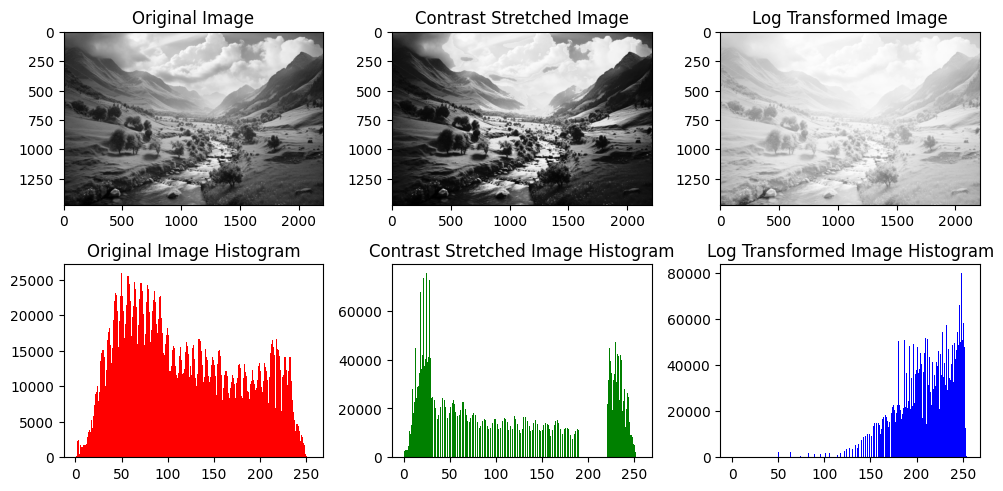

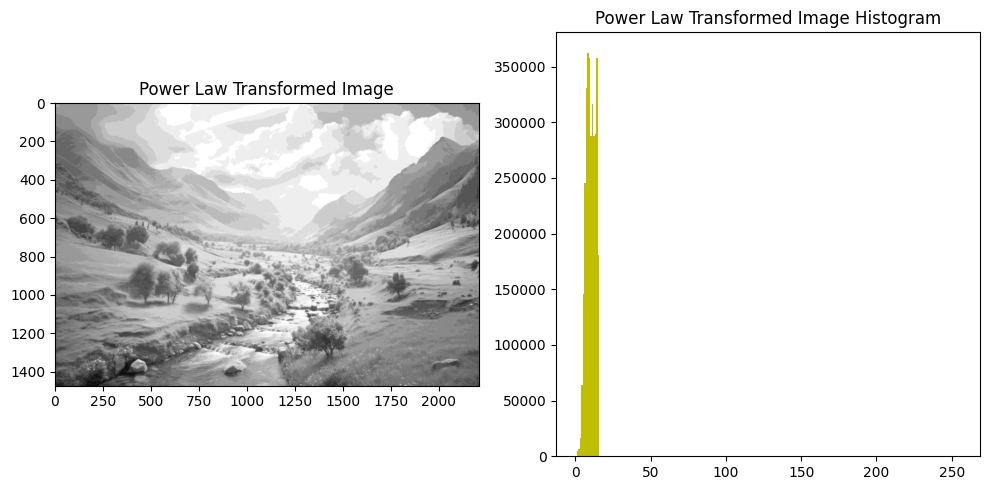

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform contrast stretching
def contrast_stretching(img, r1, s1, r2, s2):
    stretched_img = np.copy(img)
    stretched_img[stretched_img < r1] = stretched_img[stretched_img < r1] * (s1 / r1)
    stretched_img[(r1 <= stretched_img) & (stretched_img <= r2)] = ((stretched_img[(r1 <= stretched_img) & (stretched_img <= r2)] - r1) * ((s2 - s1) / (r2 - r1))) + s1
    stretched_img[stretched_img > r2] = ((stretched_img[stretched_img > r2] - r2) * ((255 - s2) / (255 - r2))) + s2
    return stretched_img.astype(np.uint8)

# Function to perform log transformation
def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_transformed_img = c * np.log(1 + img)
    return log_transformed_img.astype(np.uint8)

# Function to perform power law transformation
def power_law_transformation(img, gamma):
    c = 1
    power_law_transformed_img = c * np.power(img, gamma)
    return power_law_transformed_img.astype(np.uint8)

# Read the image
img = cv2.imread('/content/beautiful-nature-scenery-free-photo (1).jpg', cv2.IMREAD_GRAYSCALE)

# Apply contrast stretching
r1, s1, r2, s2 = 70, 30, 190, 220  # Example values for r1, s1, r2, s2
stretched_img = contrast_stretching(img, r1, s1, r2, s2)

# Apply log transformation
log_transformed_img = log_transformation(img)

# Apply power law transformation
gamma = 0.5  # Example value of gamma
power_law_transformed_img = power_law_transformation(img, gamma)

# Display histograms
plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 3, 4)
plt.hist(img.ravel(), 256, [0, 256], color='r')
plt.title('Original Image Histogram')

plt.subplot(2, 3, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title('Contrast Stretched Image')
plt.subplot(2, 3, 5)
plt.hist(stretched_img.ravel(), 256, [0, 256], color='g')
plt.title('Contrast Stretched Image Histogram')

plt.subplot(2, 3, 3)
plt.imshow(log_transformed_img, cmap='gray')
plt.title('Log Transformed Image')
plt.subplot(2, 3, 6)
plt.hist(log_transformed_img.ravel(), 256, [0, 256], color='b')
plt.title('Log Transformed Image Histogram')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(power_law_transformed_img, cmap='gray')
plt.title('Power Law Transformed Image')
plt.subplot(1, 2, 2)
plt.hist(power_law_transformed_img.ravel(), 256, [0, 256], color='y')
plt.title('Power Law Transformed Image Histogram')

plt.tight_layout()
plt.show()
